### import the required libraries

In [132]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Read the 4 day files for both countries Finland and Togo and concatinate each country in one dataframe

In [133]:
finland_10_01 = pd.read_csv("Finland 10-01")
finland_11_01 = pd.read_csv("Finland 11-01")
finland_12_01 = pd.read_csv("Finland 12-01")
finland_13_01 = pd.read_csv("Finland 13-01")
finland_df = pd.concat([finland_10_01 , finland_11_01 , finland_12_01 , finland_13_01])
togo_10_01 = pd.read_csv("Togo 10-01")
togo_11_01 = pd.read_csv("Togo 11-01")
togo_12_01 = pd.read_csv("Togo 12-01")
togo_13_01 = pd.read_csv("Togo 13-01")
togo_df = pd.concat([togo_10_01 , togo_11_01 , togo_12_01 , togo_13_01])

### get lists of the score of he sentiment analysis for the tweets of the two countries over the four days

In [134]:
finland_list = finland_df['sentiment analysis']
togo_list = togo_df['sentiment analysis']

### From World Happiness Report data over years from 2015 to 2019 get te average happiness score for both countries

In [135]:
df_2015_2019 = pd.read_csv("finalDfe.csv")
df_2015_2019 = df_2015_2019.loc[(df_2015_2019['Country'] == "Finland") | (df_2015_2019['Country'] == "Togo")]
df_2015_2019 = df_2015_2019[['Country', 'Happiness Score']]
df_2015_2019 = df_2015_2019.dropna()

In [136]:
grouped_df = df_2015_2019.groupby("Country")
mean_df = grouped_df.mean()

In [137]:
togoValues = togo_list.values.tolist()
togoValues.append(mean_df.iloc[1]['Happiness Score'])

finlandValues = finland_list.values.tolist()
finlandValues.append(mean_df.iloc[0]['Happiness Score'])

### Using the bar chart graph to visually compare the results we got from the World Happiness Report dataset and the result from the analysis processes

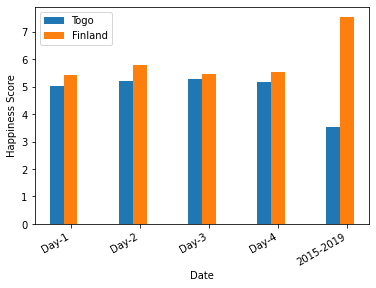

In [138]:
fig_4, axs_5 = plt.subplots(1,1)
axs_5.set_xlabel('Date')
axs_5.set_ylabel('Happiness Score')
temp_x =np.arange(len(togoValues))
axs_5.bar(np.arange(len(togoValues)),togoValues,width=0.2,label="Togo")#draw the male bar graph
axs_5.bar(temp_x+0.2,finlandValues,width=0.2,label="Finland")#draw the female bar graph 0.2 away from the male
plt.xticks(temp_x+0.2, [f"Day-{i+1}" for i in range(4)] + ["2015-2019"])#create the labels of the x axis (Class-1, Class-2, Class-3)
# plt.xticks(temp_x+0.2, ["Day" , "00000","m" , "l" , "p" ])
plt.setp(axs_5.get_xticklabels(),rotation=30,ha="right")#rotate the labels on the x axis by 30 degrees to the right
axs_5.legend(loc=2)